In [1]:
# Import relevant packages
import gurobipy as gp                 # Gurobi Python API
from gurobipy import GRB              # Gurobi constants (e.g., GRB.MAXIMIZE)

import pandas as pd                   # DataFrames
import matplotlib.pyplot as plt       # Plotting
import numpy as np                    # Numerical operations (similar to Julia base)

import warnings
warnings.filterwarnings("ignore", message=".*All values for SymLogScale are below linthresh.*")

In [2]:
# Import auxiliary functions
from functions_data import *
from functions_model import *
from functions_plots import *
from functions_policy import *

In [3]:
from main import main

## Winter Scenario for 4 players

  Player   OC   Eta   E_max  Q_max  \
0      A  5.0  0.85   370.0  188.0   
1      B  5.0  0.85   750.0  377.0   
2      C  5.0  0.85  1130.0  566.0   
3      D  5.0  0.85  1510.0  755.0   

                                             Q_steps  
0  [0.0, 18.8, 37.6, 56.4, 75.2, 94.0, 112.8, 131...  
1  [0.0, 37.7, 75.4, 113.1, 150.8, 188.5, 226.2, ...  
2  [0.0, 56.6, 113.2, 169.8, 226.4, 283.0, 339.6,...  
3  [0.0, 75.5, 151.0, 226.5, 302.0, 377.5, 453.0,...  
Set parameter Username
Academic license - for non-commercial use only - expires 2025-10-28
Convergence has not been reached. Let's try again by fixing player A outputs.
Convergence has not been reached. Let's try again by fixing player B outputs.
Optimization was successful. It converged in 59 iterations.


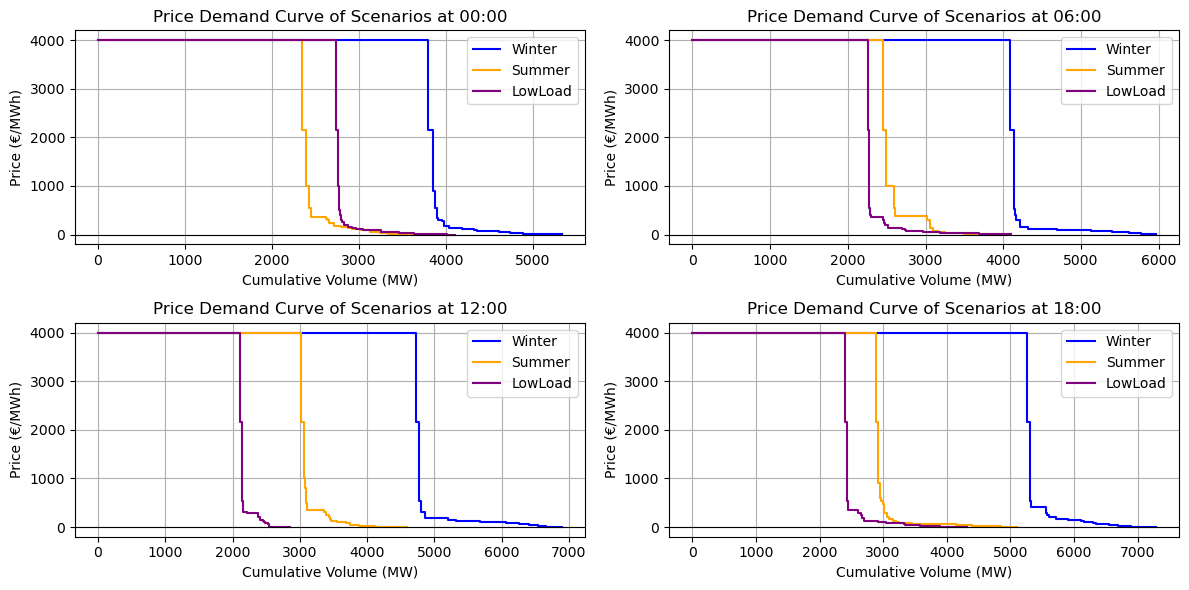

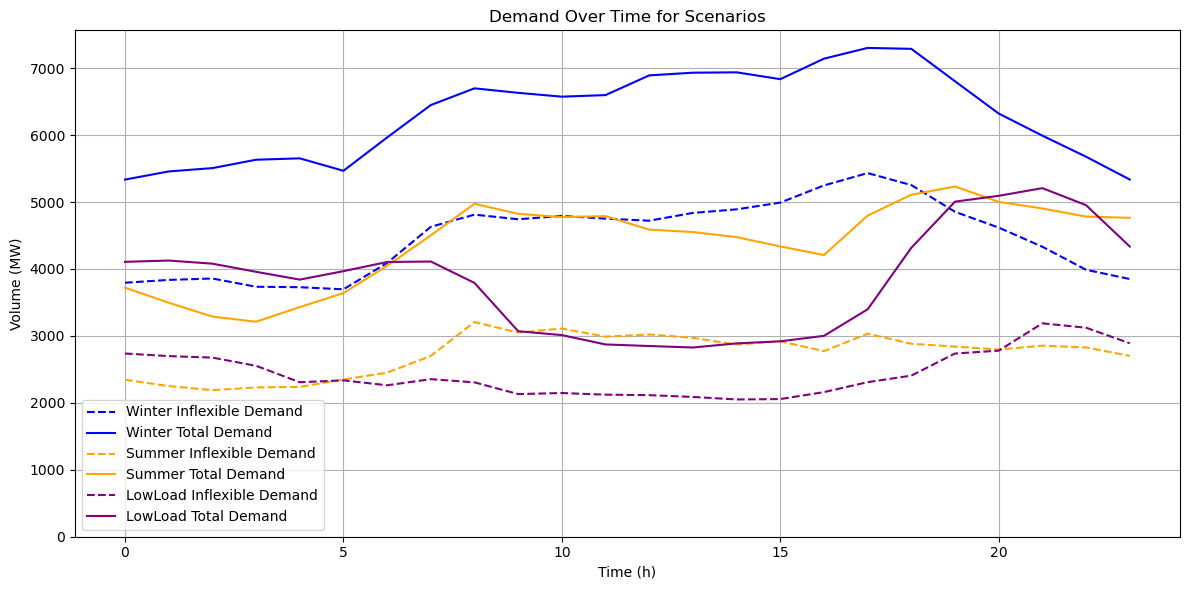

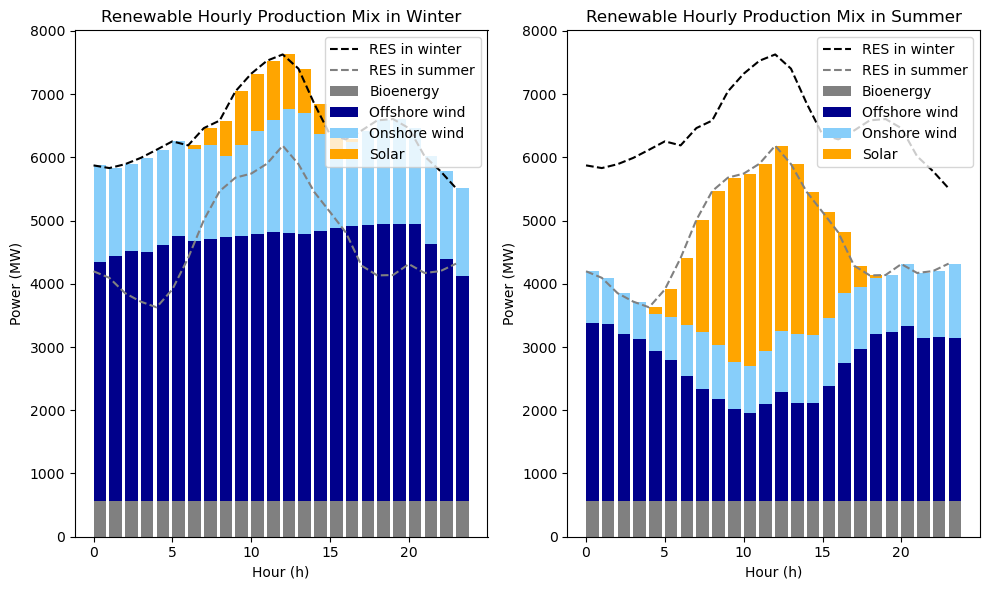

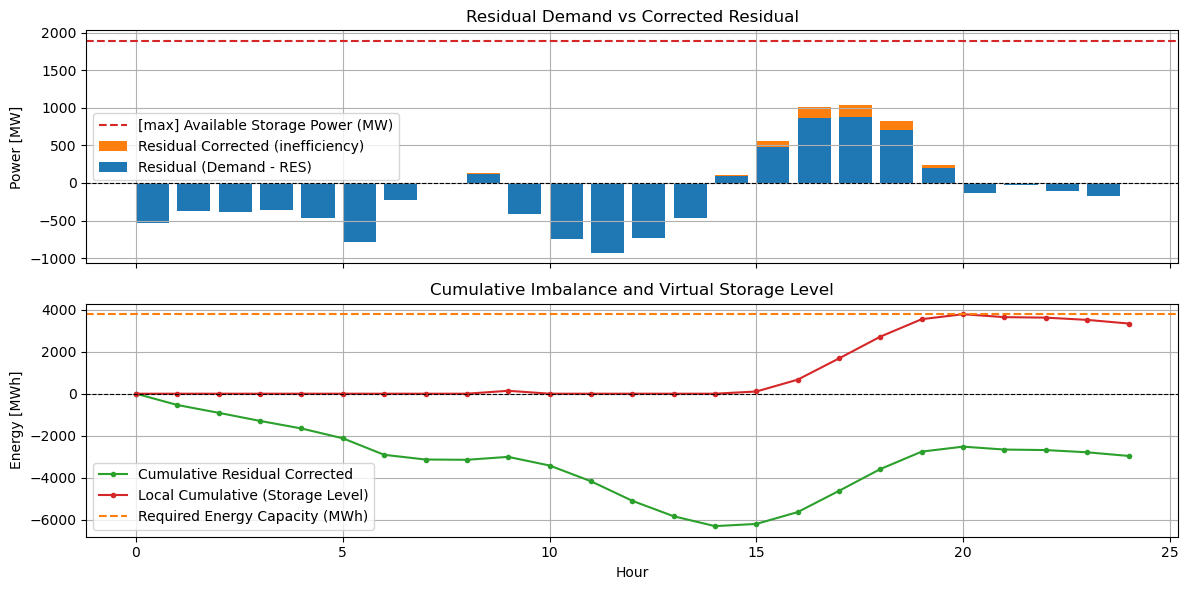

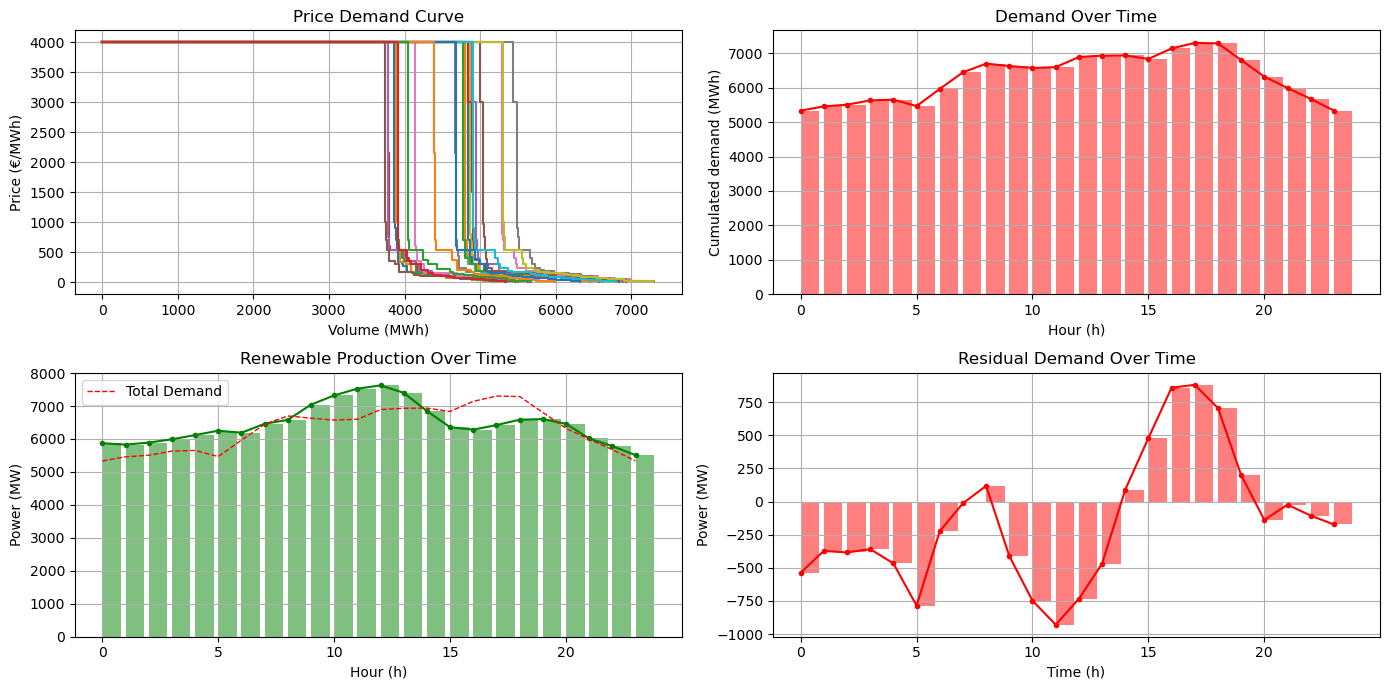

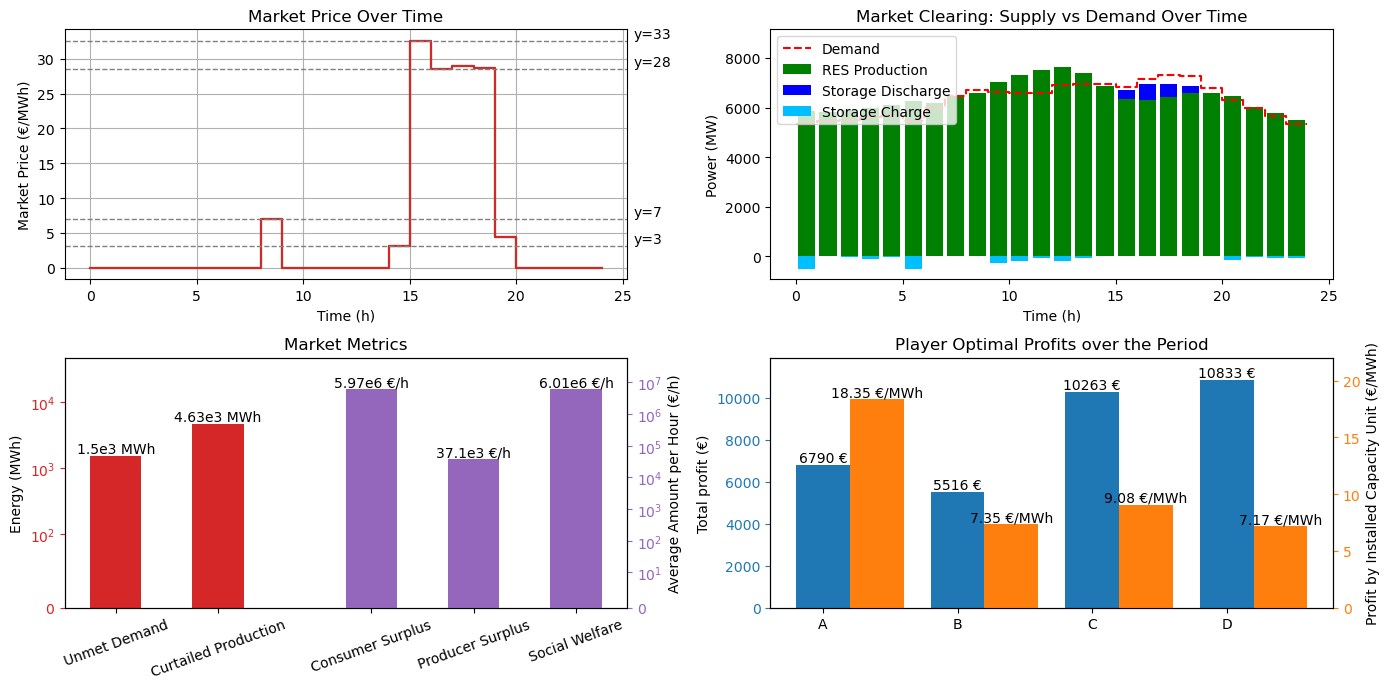

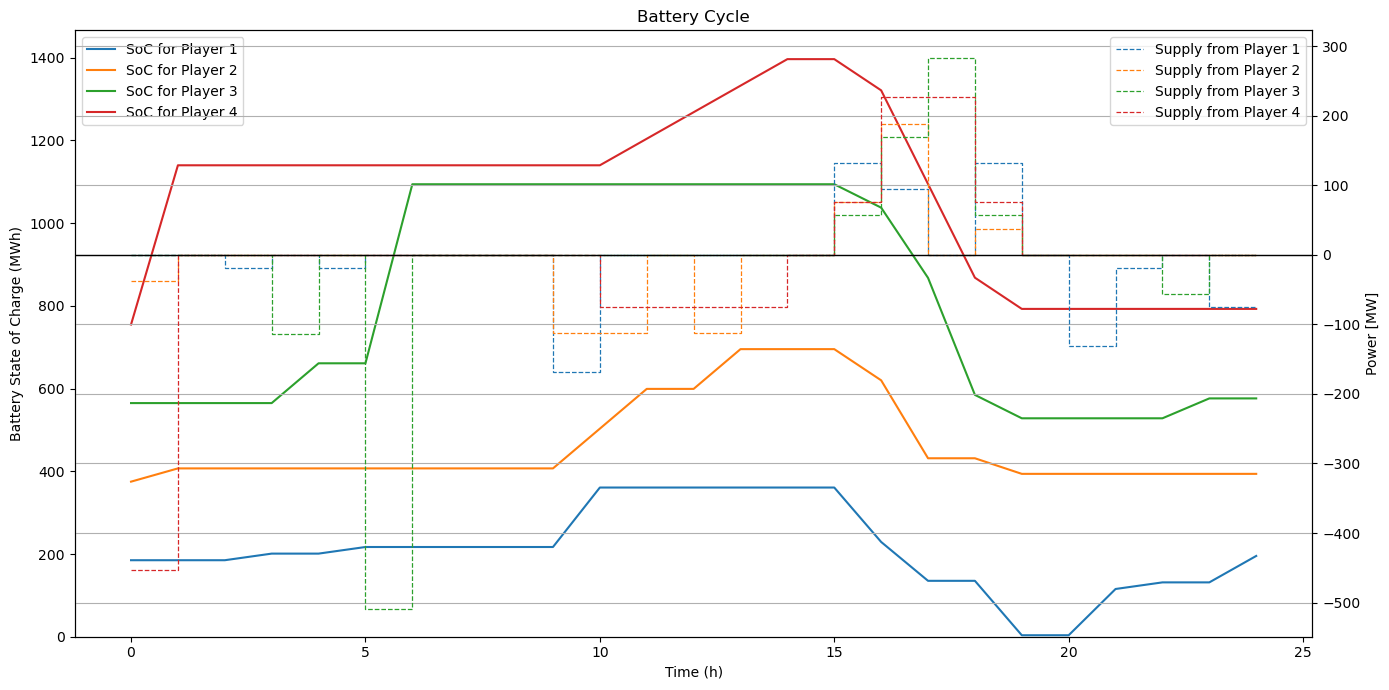

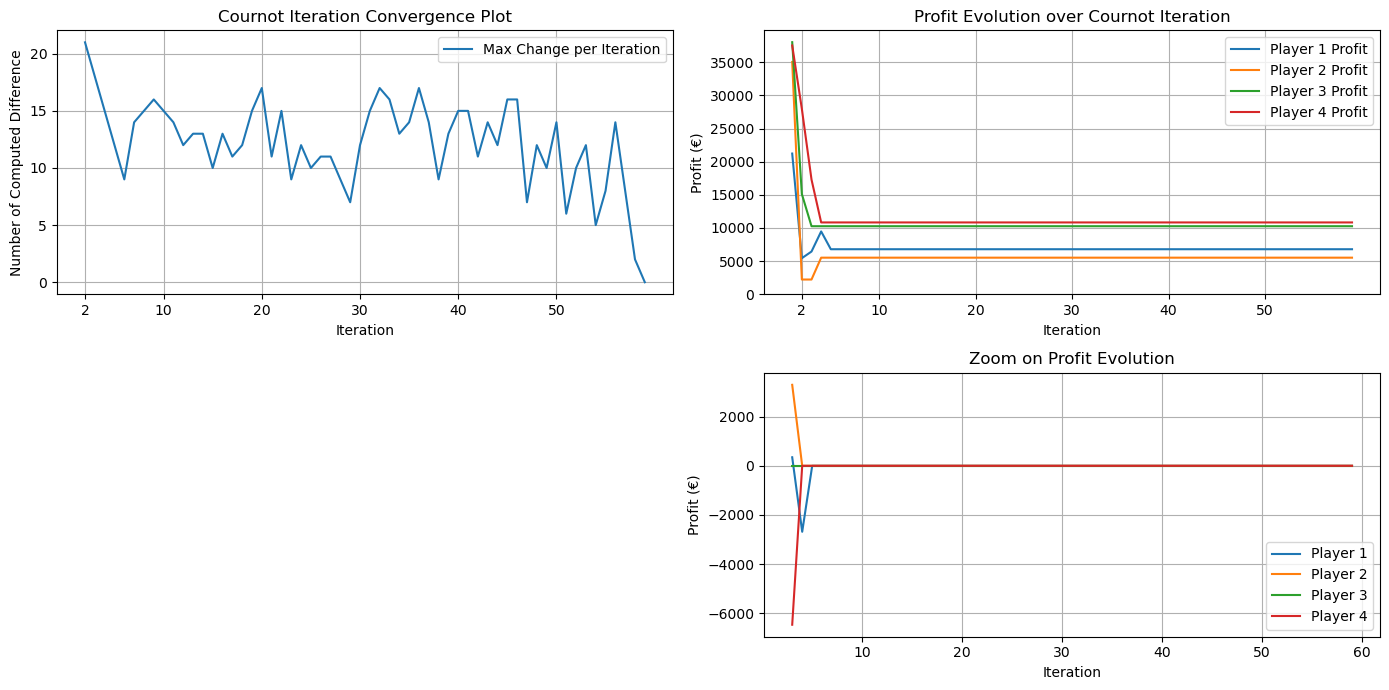

In [4]:
output = main(season='Winter', data_plots=True, scenario_plots=True, n_players=4)

## Summer Scenario for 4 players

  Player   OC   Eta   E_max   Q_max  \
0      A  5.0  0.85   590.0   296.0   
1      B  5.0  0.85  1180.0   592.0   
2      C  5.0  0.85  1770.0   888.0   
3      D  5.0  0.85  2360.0  1184.0   

                                             Q_steps  
0  [0.0, 29.6, 59.2, 88.8, 118.4, 148.0, 177.6, 2...  
1  [0.0, 59.2, 118.4, 177.6, 236.8, 296.0, 355.2,...  
2  [0.0, 88.8, 177.6, 266.4, 355.2, 444.0, 532.8,...  
3  [0.0, 118.4, 236.8, 355.2, 473.6, 592.0, 710.4...  
Optimization was successful. It converged in 11 iterations.


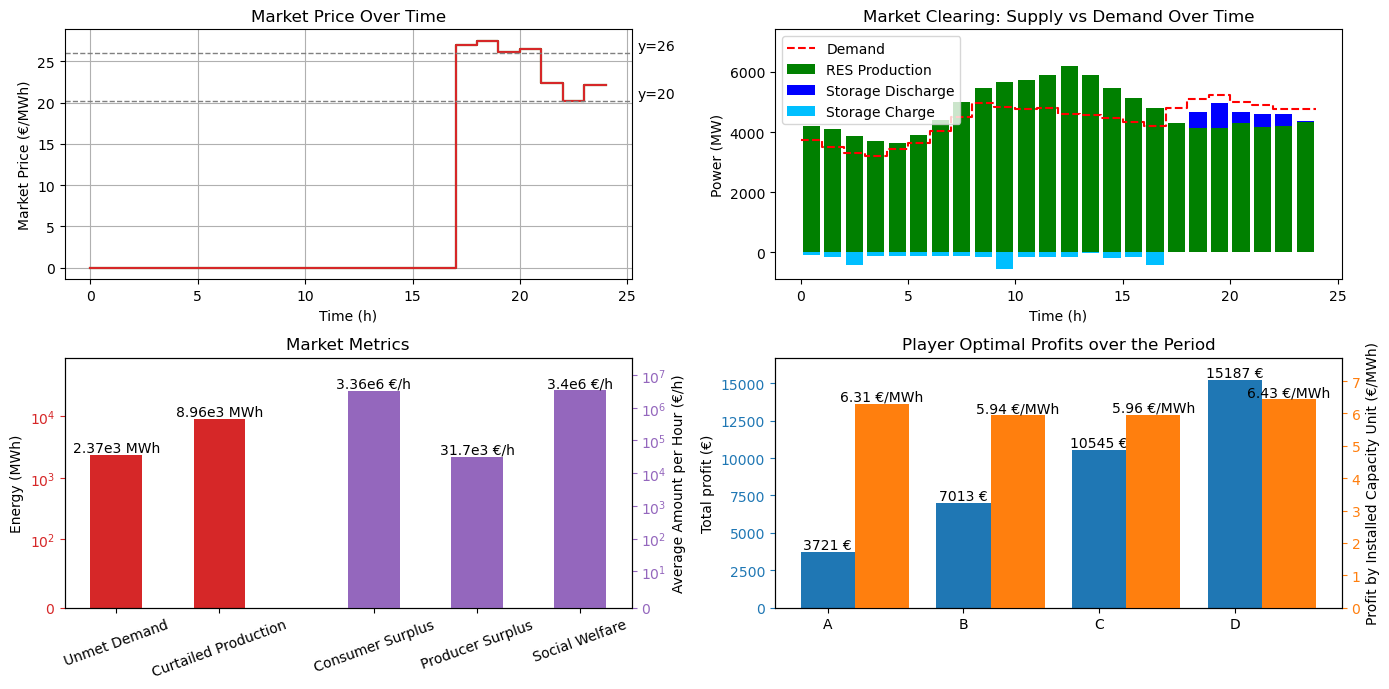

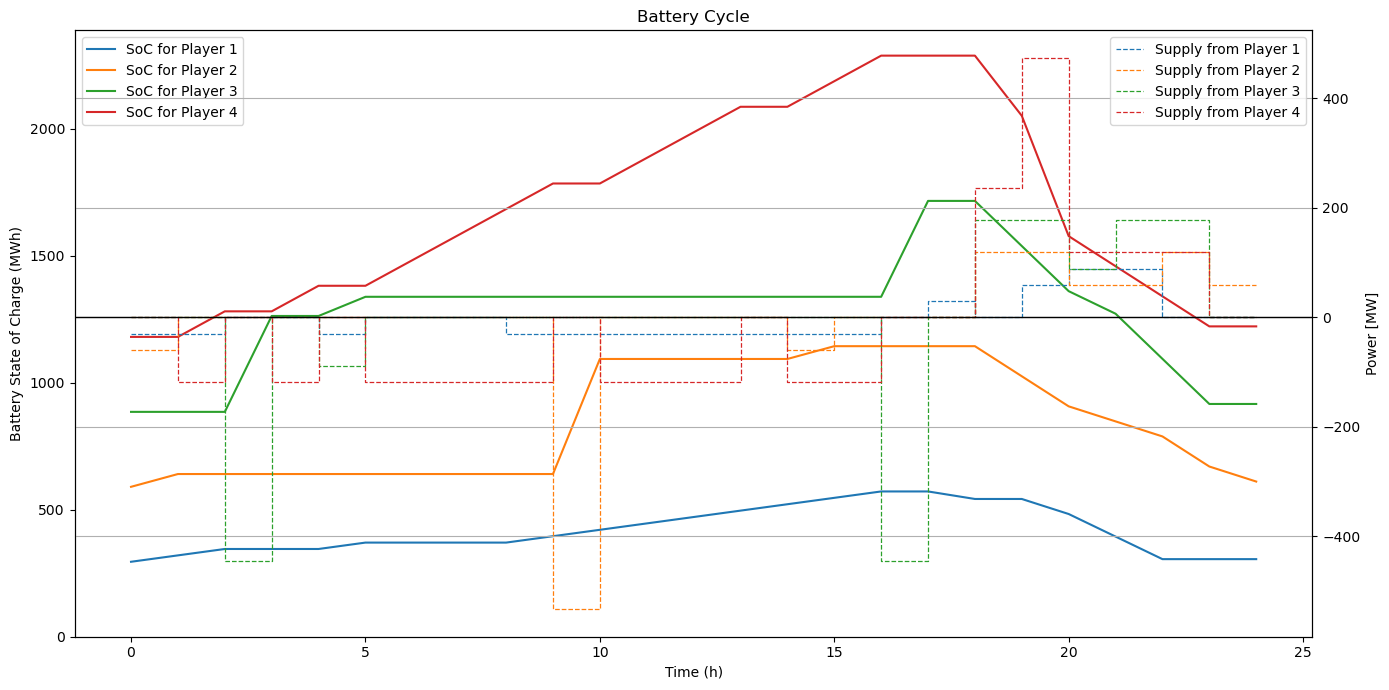

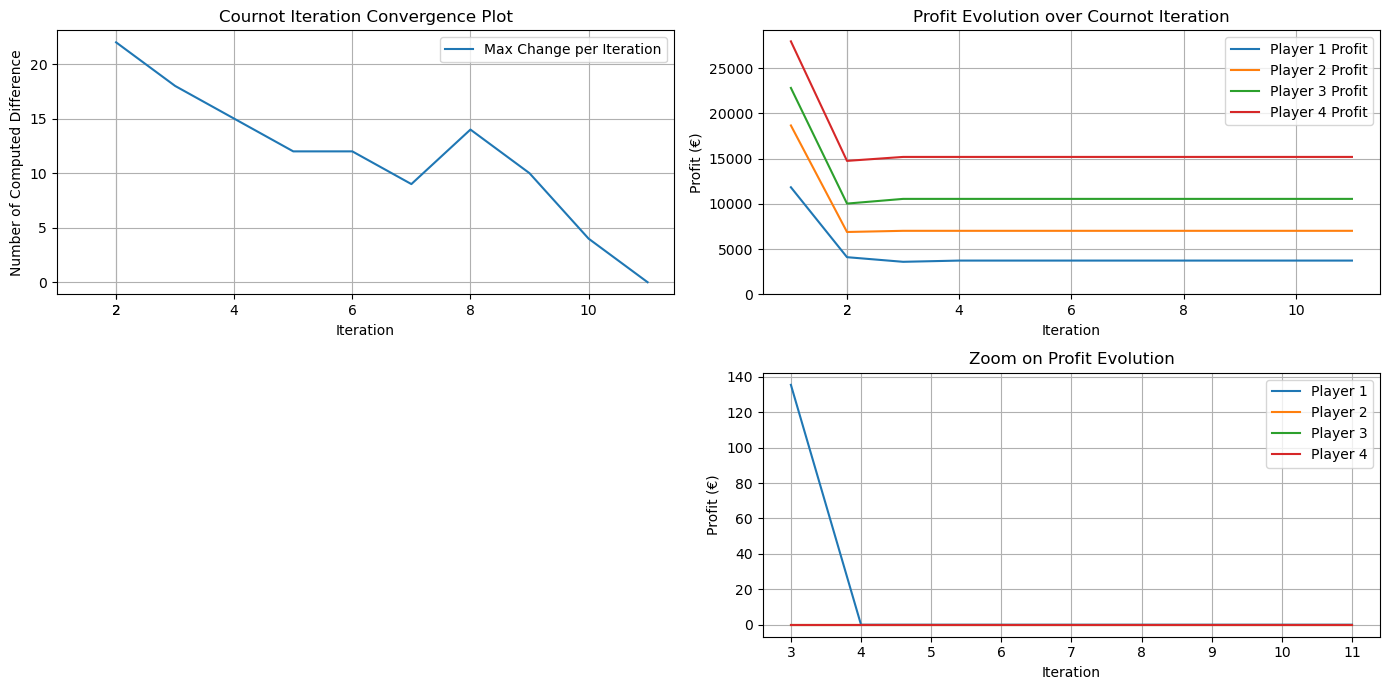

In [5]:
output = main(season='Summer', data_plots=False, scenario_plots=False, n_players=4)

## Low Load Scenario for 4 players

  Player   OC   Eta   E_max  Q_max  \
0      A  5.0  0.85   420.0  214.0   
1      B  5.0  0.85   850.0  428.0   
2      C  5.0  0.85  1280.0  642.0   
3      D  5.0  0.85  1710.0  856.0   

                                             Q_steps  
0  [0.0, 21.4, 42.8, 64.2, 85.6, 107.0, 128.4, 14...  
1  [0.0, 42.8, 85.6, 128.4, 171.2, 214.0, 256.8, ...  
2  [0.0, 64.2, 128.4, 192.6, 256.8, 321.0, 385.2,...  
3  [0.0, 85.6, 171.2, 256.8, 342.4, 428.0, 513.6,...  
Optimization was successful. It converged in 8 iterations.


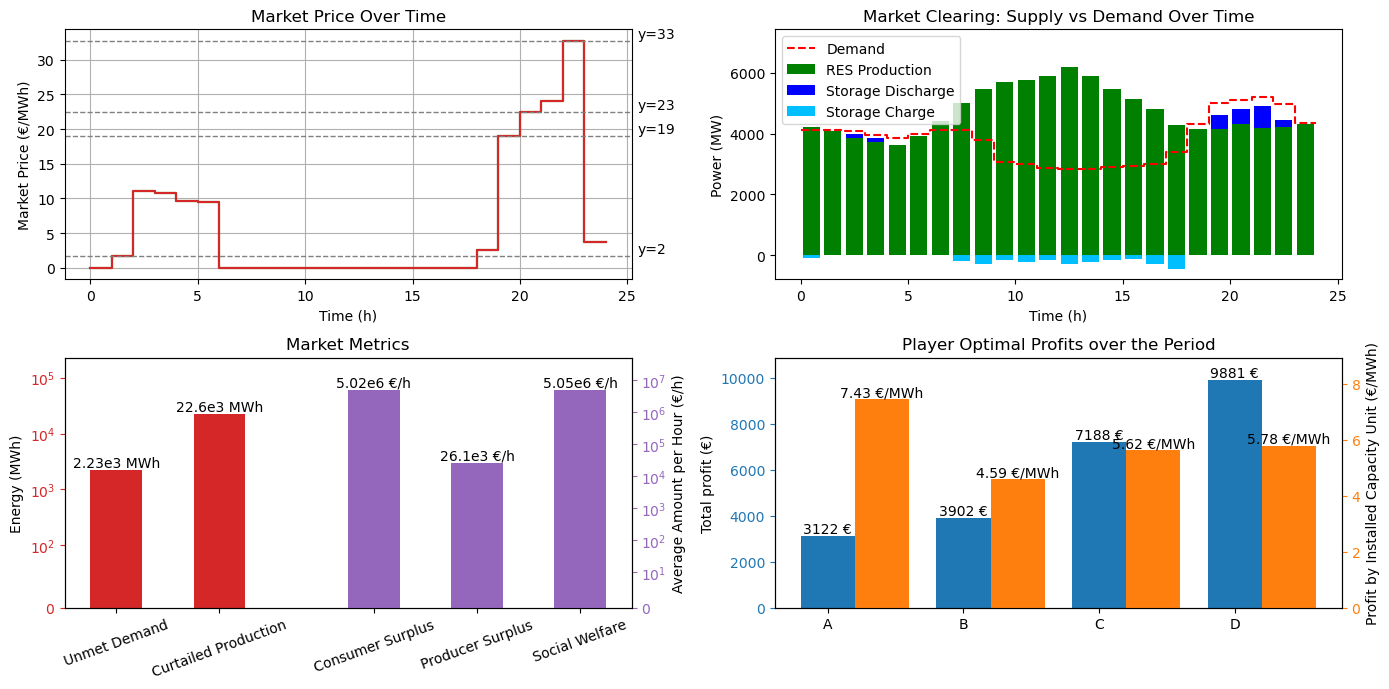

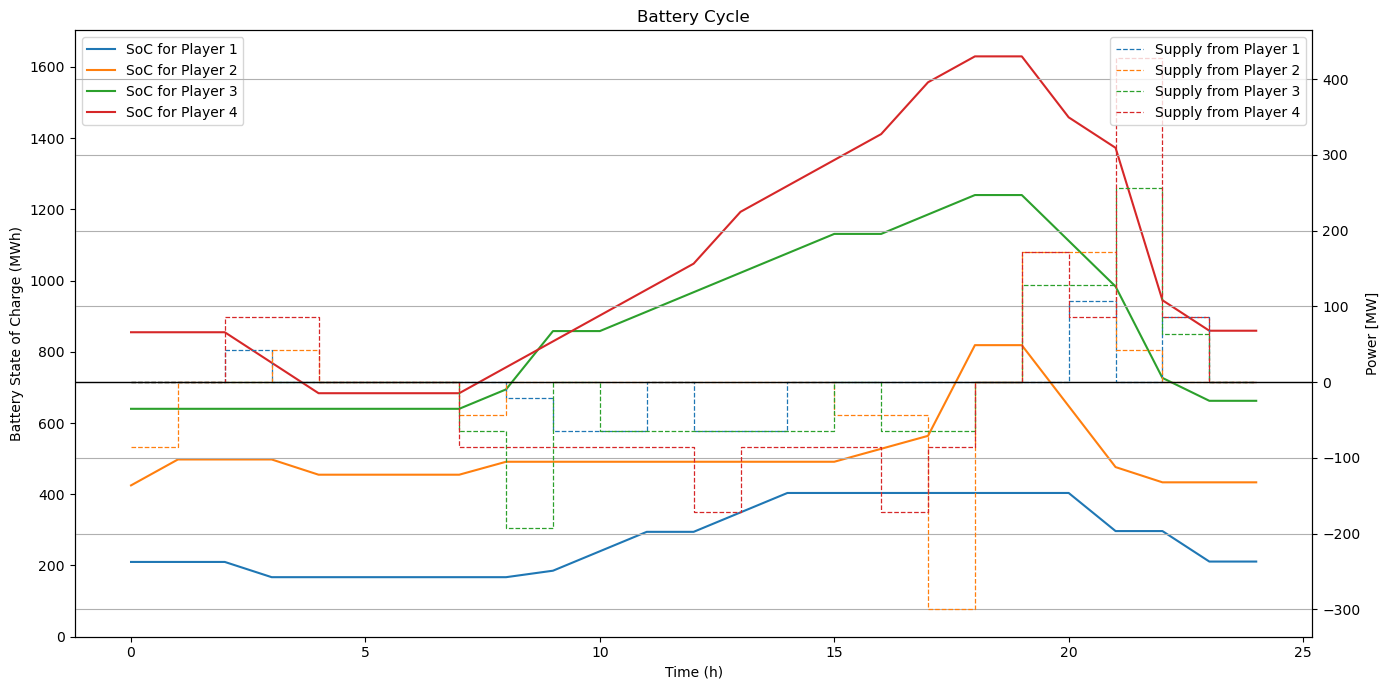

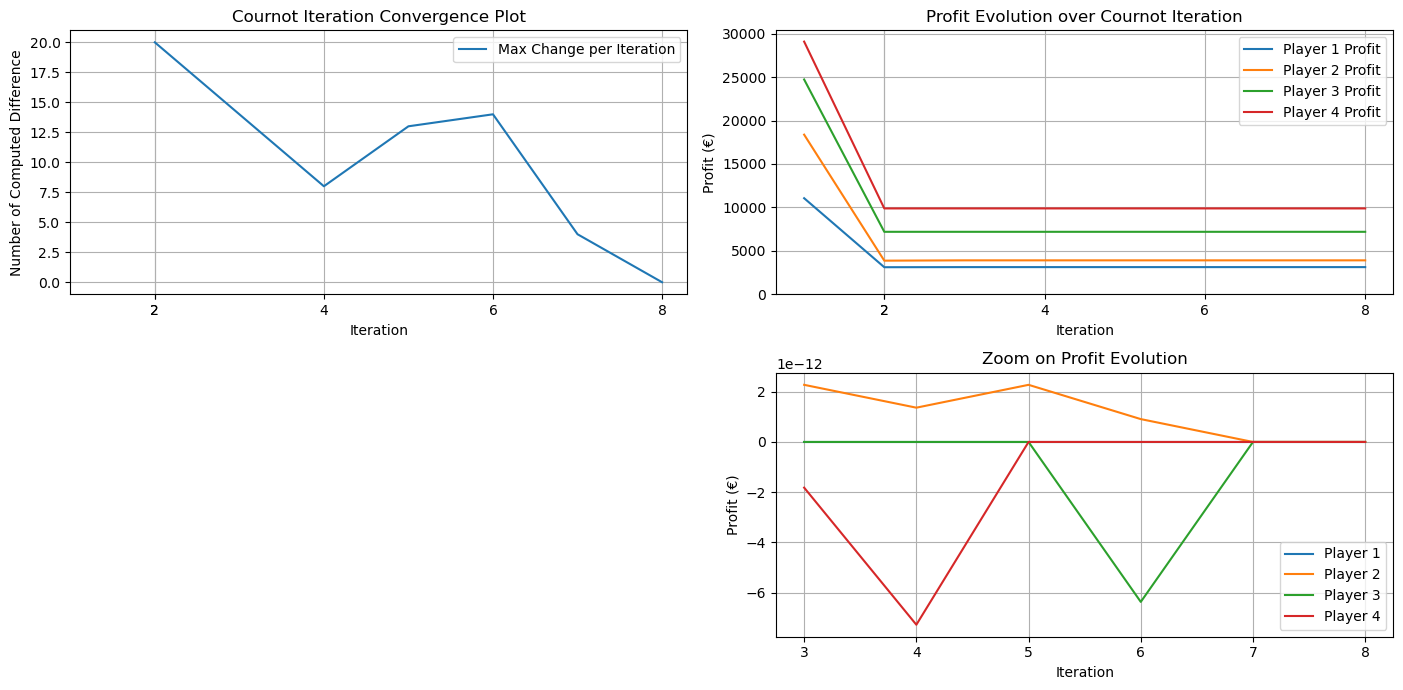

In [6]:
output = main(season='LowLoad', data_plots=False, scenario_plots=False, n_players=4)

## Policy Modelling

In [7]:
## Policy parameters
# Hourly Grid Tariff List (€/MWh) – Winter Example
hourly_discharging_tariffs = [
    3.0,  # 00:00
    3.0,
    3.0,
    3.0,
    3.0,
    3.0,
    2.0,  # 06:00
    2.0,
    1.5,
    1.5,
    1.5,
    1.5,
    1.5,
    1.5,
    1.5,
    1.0,
    1.0,
    0.5,  # 17:00 peak -> incentivized discharge
    0.5,
    0.5,
    0.5,
    1.0,
    2.0,
    3.0   # 23:00
]


scenarios = [
    {"name": "baseline", "policy_type": "none"},
    {"name": "flat_tariff", "policy_type": "grid_tariff_flat", "tau_ch": 2.0, "tau_dis": 2.0},
    {"name": "hourly_tariff", "policy_type": "grid_tariff_hourly", "tau_ch": 2.0, "tau_dis": hourly_discharging_tariffs},
    {"name": "dynamic_tariff", "policy_type": "grid_tariff_dynamic", "tau_ch": 2.0, "alpha": 0.01, "base_tariff": 5.0, "floor_tariff": 0.5},
    # {"name": "flat_tariff", "policy_type": "capacity", "tau_ch": 5.0, "tau_dis": 0.0},
    # {"name": "flat_tariff", "policy_type": "curtailment", "tau_ch": 5.0, "tau_dis": 0.0},    
    # {"name": "all_policies", "policy_type": "all", "tau_ch": 5.0, "tau_dis": 0.0,
    #  "P_max": 10, "payment_rate": 3000, "q_charge_curt": curtailed_energy, "price_curt": 10}
]

outputs = {}

Optimization with modelling policy: baseline
  Player   OC   Eta   E_max  Q_max  \
0      A  5.0  0.85   420.0  214.0   
1      B  5.0  0.85   850.0  428.0   
2      C  5.0  0.85  1280.0  642.0   
3      D  5.0  0.85  1710.0  856.0   

                                             Q_steps  
0  [0.0, 21.4, 42.8, 64.2, 85.6, 107.0, 128.4, 14...  
1  [0.0, 42.8, 85.6, 128.4, 171.2, 214.0, 256.8, ...  
2  [0.0, 64.2, 128.4, 192.6, 256.8, 321.0, 385.2,...  
3  [0.0, 85.6, 171.2, 256.8, 342.4, 428.0, 513.6,...  
Optimization was successful. It converged in 8 iterations.


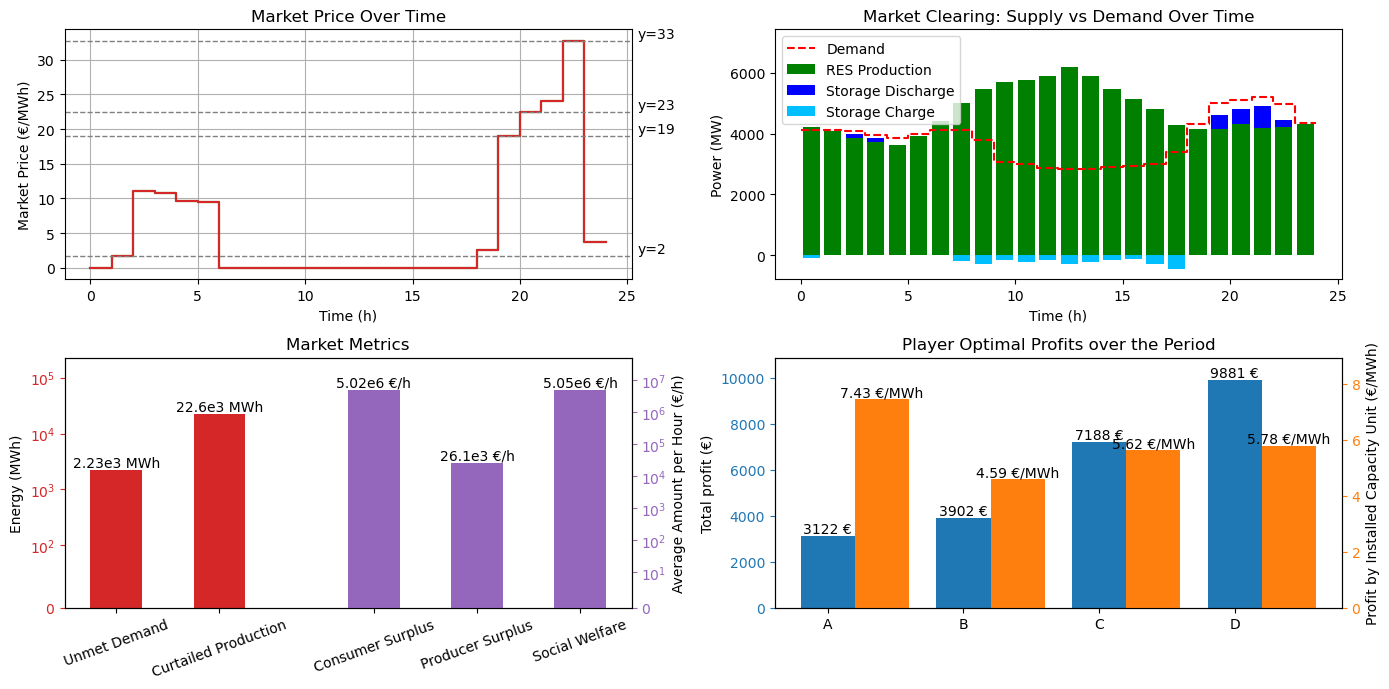

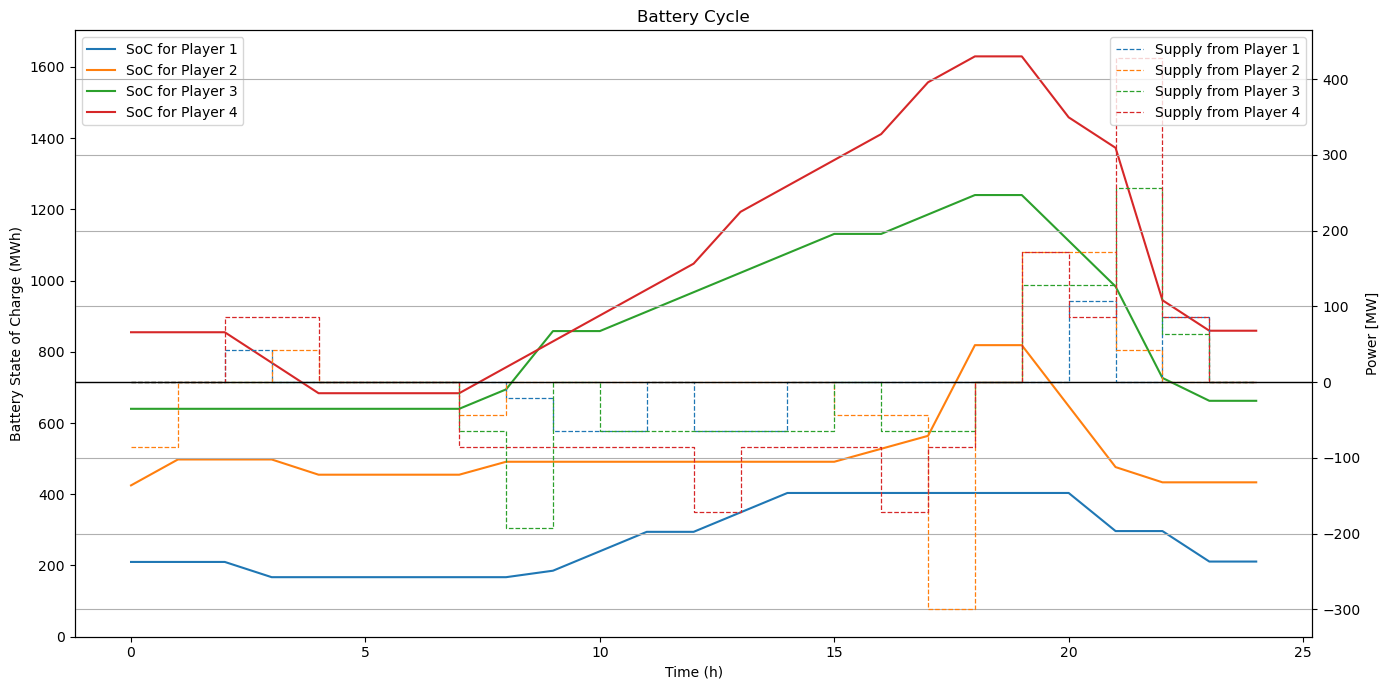

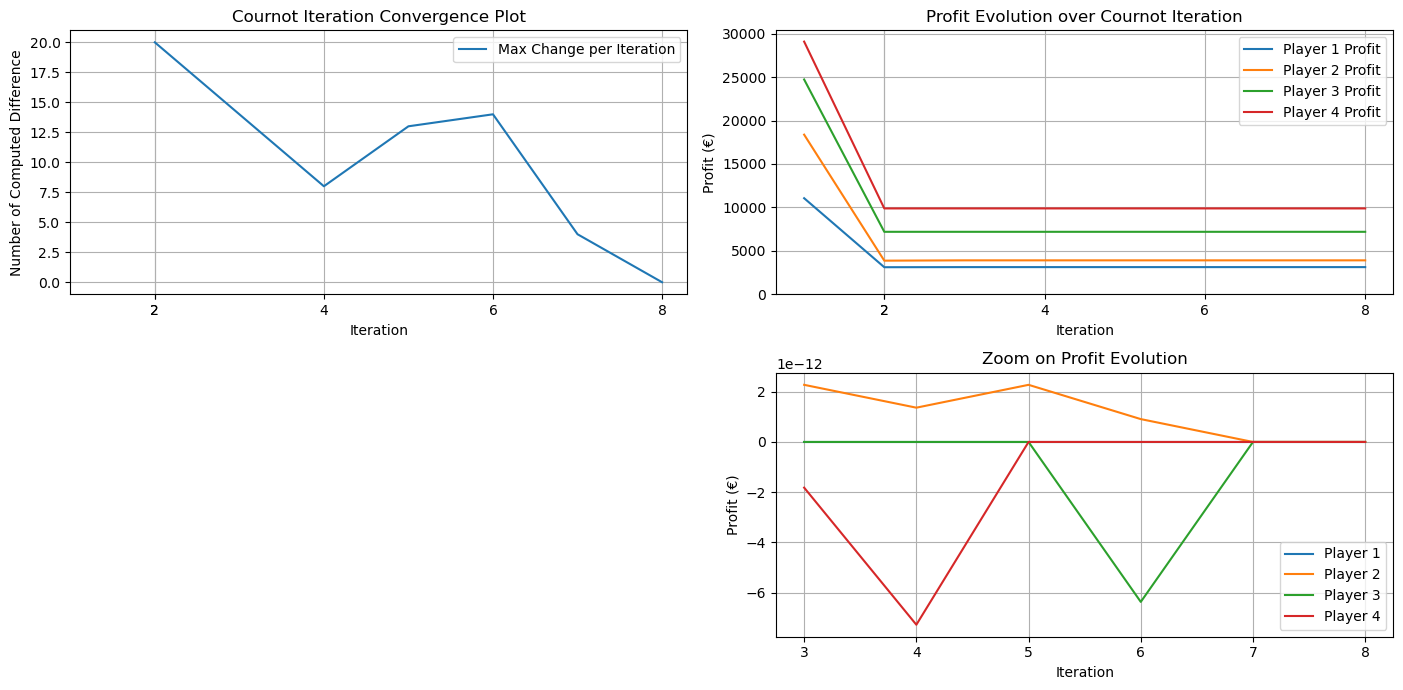

In [ ]:
index = 0
sc = scenarios[index]
print("Optimization with modelling policy:", sc["name"])
outputs[sc["name"]] = main(policy_type=sc["policy_type"], policy_parameters={k: v for k, v in sc.items() if k != "name" and k != "policy_type"})

Optimization with modelling policy: flat_tariff
  Player   OC   Eta   E_max  Q_max  \
0      A  5.0  0.85   420.0  214.0   
1      B  5.0  0.85   850.0  428.0   
2      C  5.0  0.85  1280.0  642.0   
3      D  5.0  0.85  1710.0  856.0   

                                             Q_steps  
0  [0.0, 21.4, 42.8, 64.2, 85.6, 107.0, 128.4, 14...  
1  [0.0, 42.8, 85.6, 128.4, 171.2, 214.0, 256.8, ...  
2  [0.0, 64.2, 128.4, 192.6, 256.8, 321.0, 385.2,...  
3  [0.0, 85.6, 171.2, 256.8, 342.4, 428.0, 513.6,...  
Optimization was successful. It converged in 8 iterations.


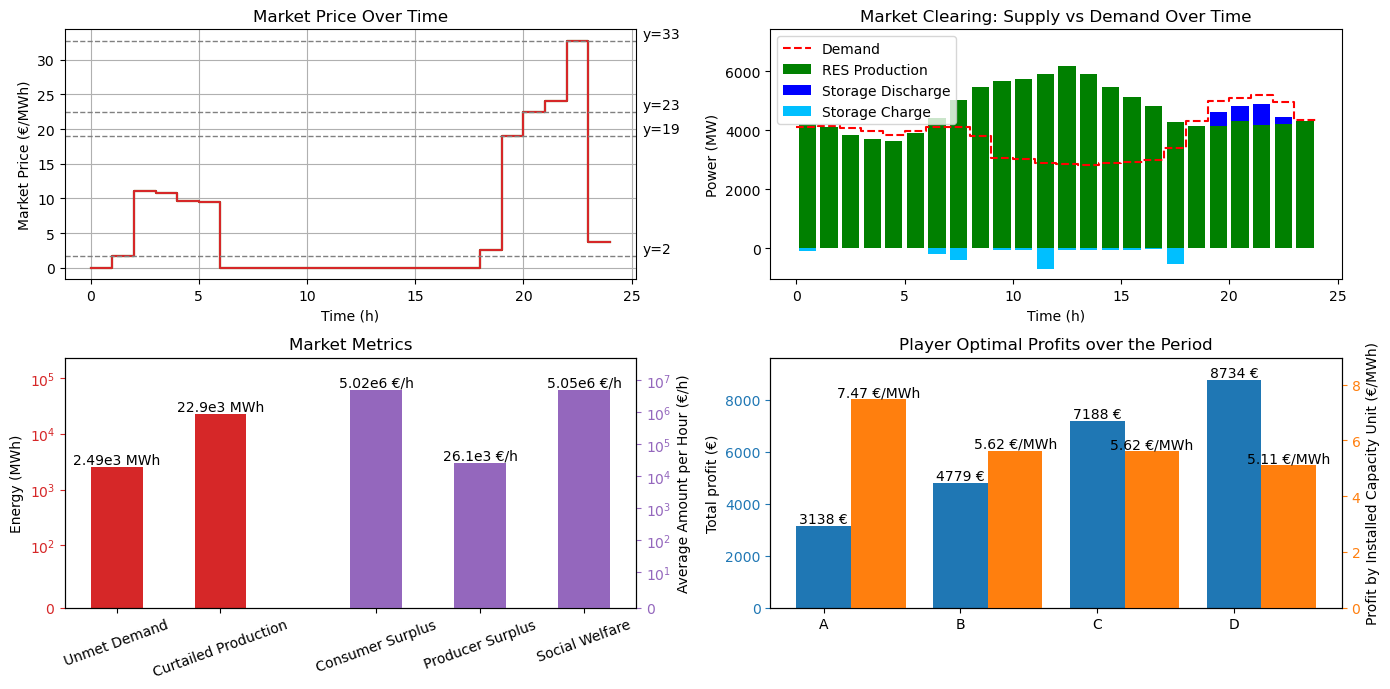

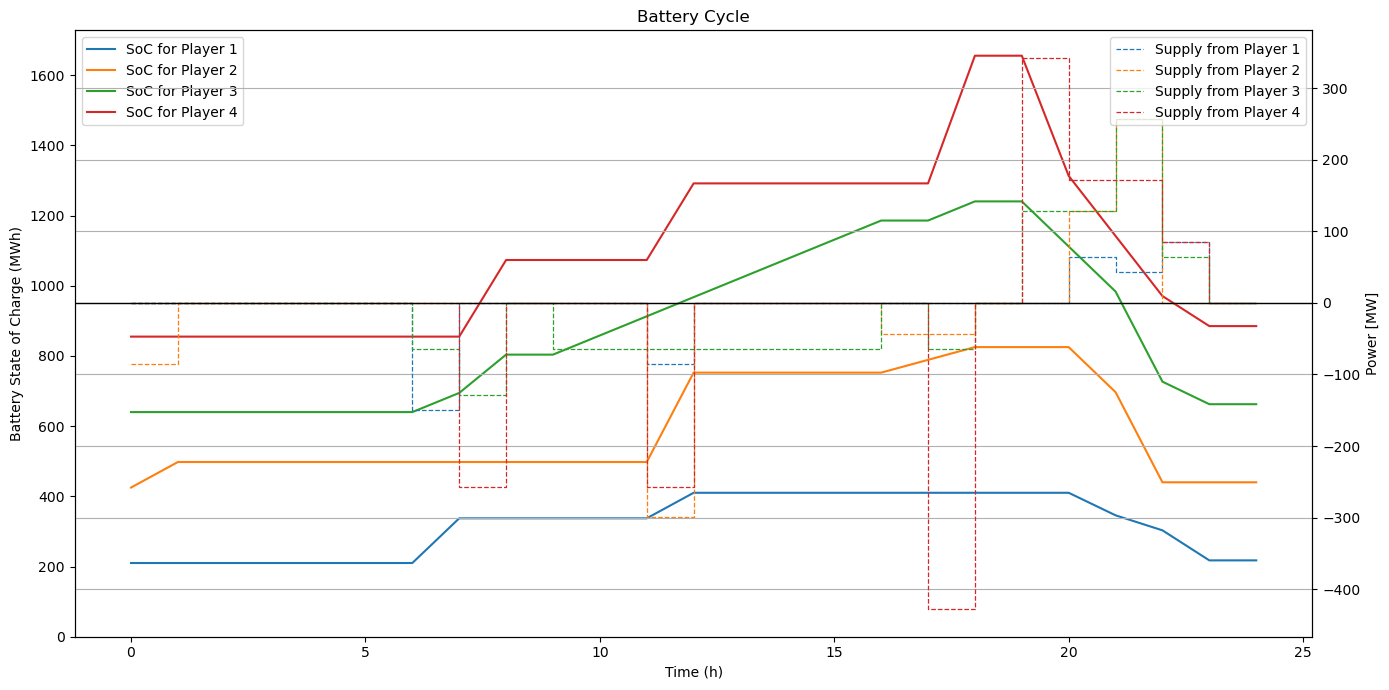

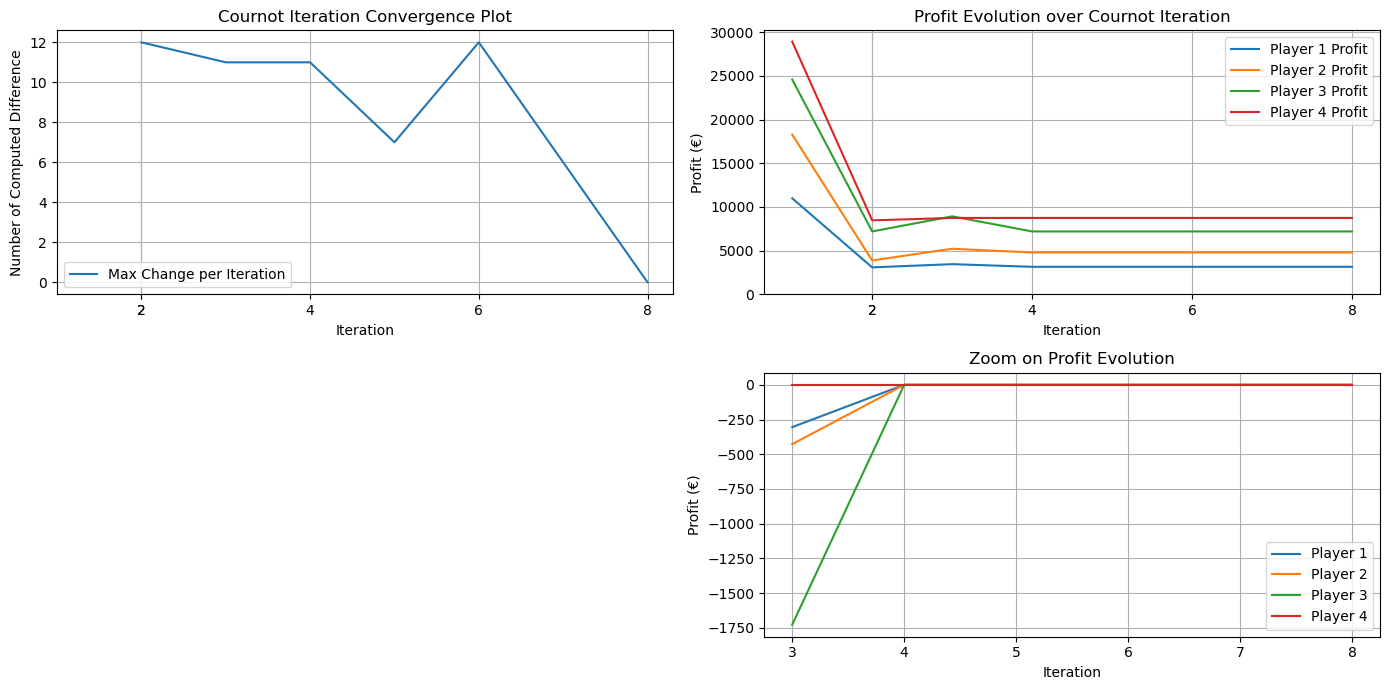

In [9]:
index += 1
sc = scenarios[index]
print("Optimization with modelling policy:", sc["name"])
outputs[sc["name"]] = main(season='LowLoad', n_players=4, policy_type=sc["policy_type"], policy_parameters={k: v for k, v in sc.items() if k != "name" and k != "policy_type"})


Optimization with modelling policy: hourly_tariff
  Player   OC   Eta   E_max  Q_max  \
0      A  5.0  0.85   420.0  214.0   
1      B  5.0  0.85   850.0  428.0   
2      C  5.0  0.85  1280.0  642.0   
3      D  5.0  0.85  1710.0  856.0   

                                             Q_steps  
0  [0.0, 21.4, 42.8, 64.2, 85.6, 107.0, 128.4, 14...  
1  [0.0, 42.8, 85.6, 128.4, 171.2, 214.0, 256.8, ...  
2  [0.0, 64.2, 128.4, 192.6, 256.8, 321.0, 385.2,...  
3  [0.0, 85.6, 171.2, 256.8, 342.4, 428.0, 513.6,...  
Convergence has not been reached. Let's try again by fixing player A outputs.
Convergence has not been reached. Let's try again by fixing player B outputs.
Convergence has not been reached. Let's try again by fixing player C outputs.
Optimization was successful. It converged in 61 iterations.


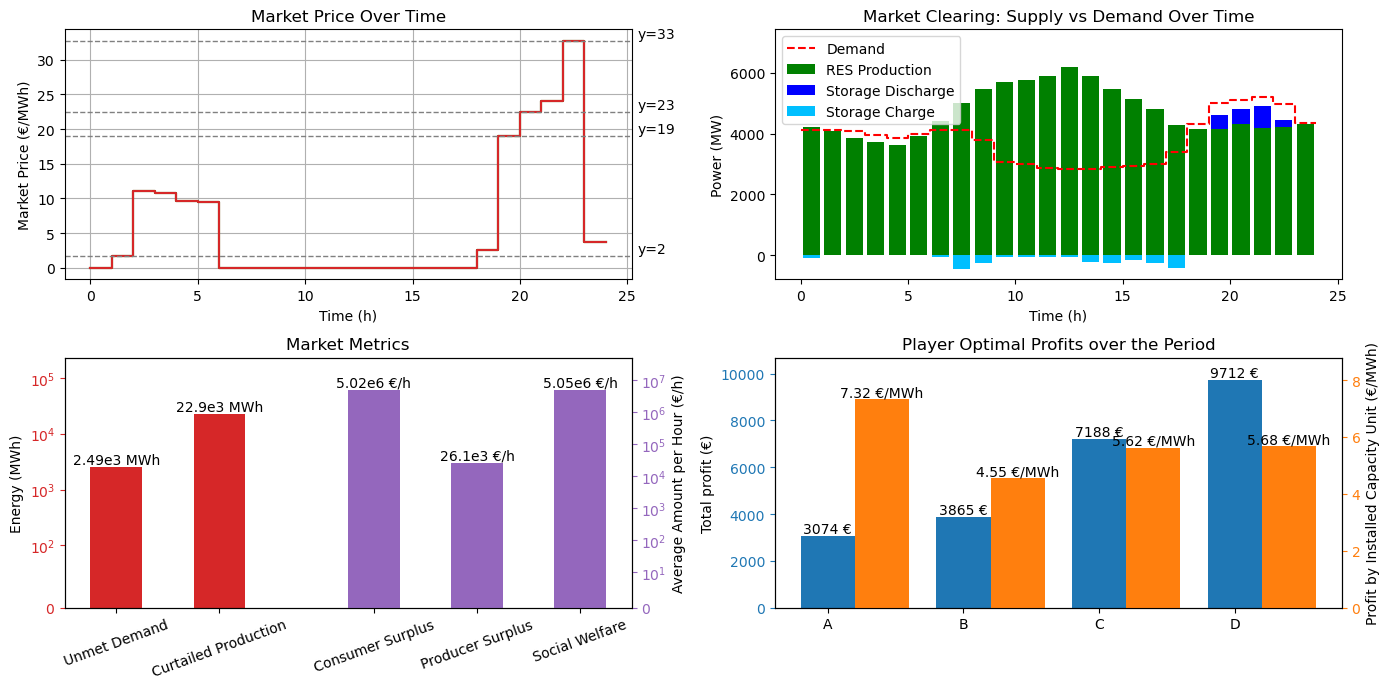

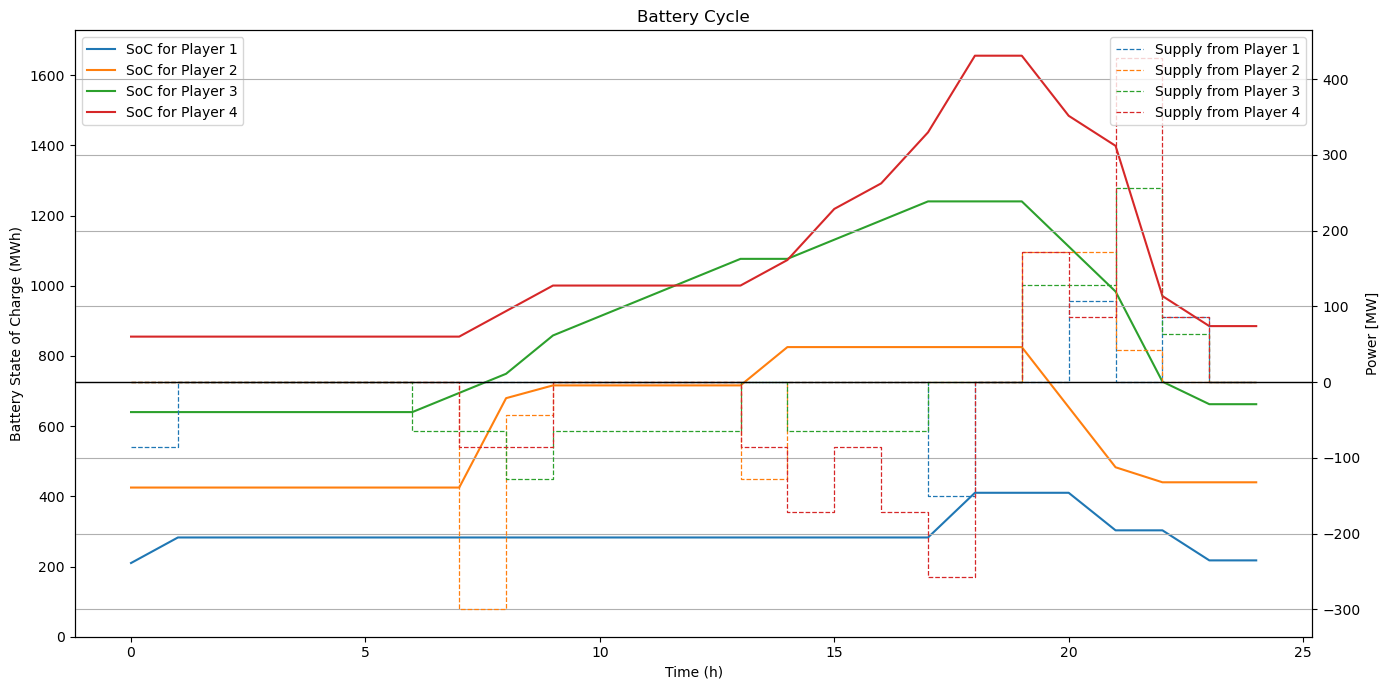

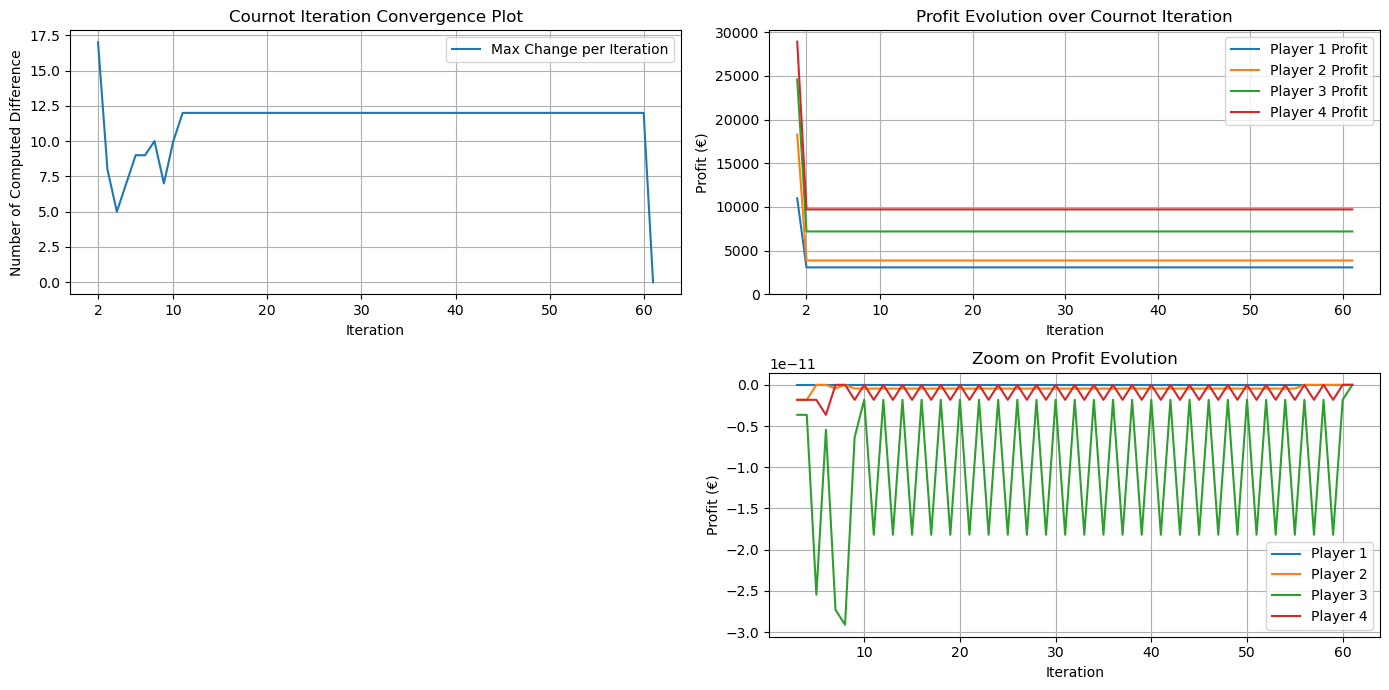

In [10]:
index += 1
sc = scenarios[index]
print("Optimization with modelling policy:", sc["name"])
outputs[sc["name"]] = main(season='LowLoad', n_players=4, policy_type=sc["policy_type"], policy_parameters={k: v for k, v in sc.items() if k != "name" and k != "policy_type"})

Optimization with modelling policy: dynamic_tariff
  Player   OC   Eta   E_max  Q_max  \
0      A  5.0  0.85   420.0  214.0   
1      B  5.0  0.85   850.0  428.0   
2      C  5.0  0.85  1280.0  642.0   
3      D  5.0  0.85  1710.0  856.0   

                                             Q_steps  
0  [0.0, 21.4, 42.8, 64.2, 85.6, 107.0, 128.4, 14...  
1  [0.0, 42.8, 85.6, 128.4, 171.2, 214.0, 256.8, ...  
2  [0.0, 64.2, 128.4, 192.6, 256.8, 321.0, 385.2,...  
3  [0.0, 85.6, 171.2, 256.8, 342.4, 428.0, 513.6,...  
Optimization was successful. It converged in 8 iterations.


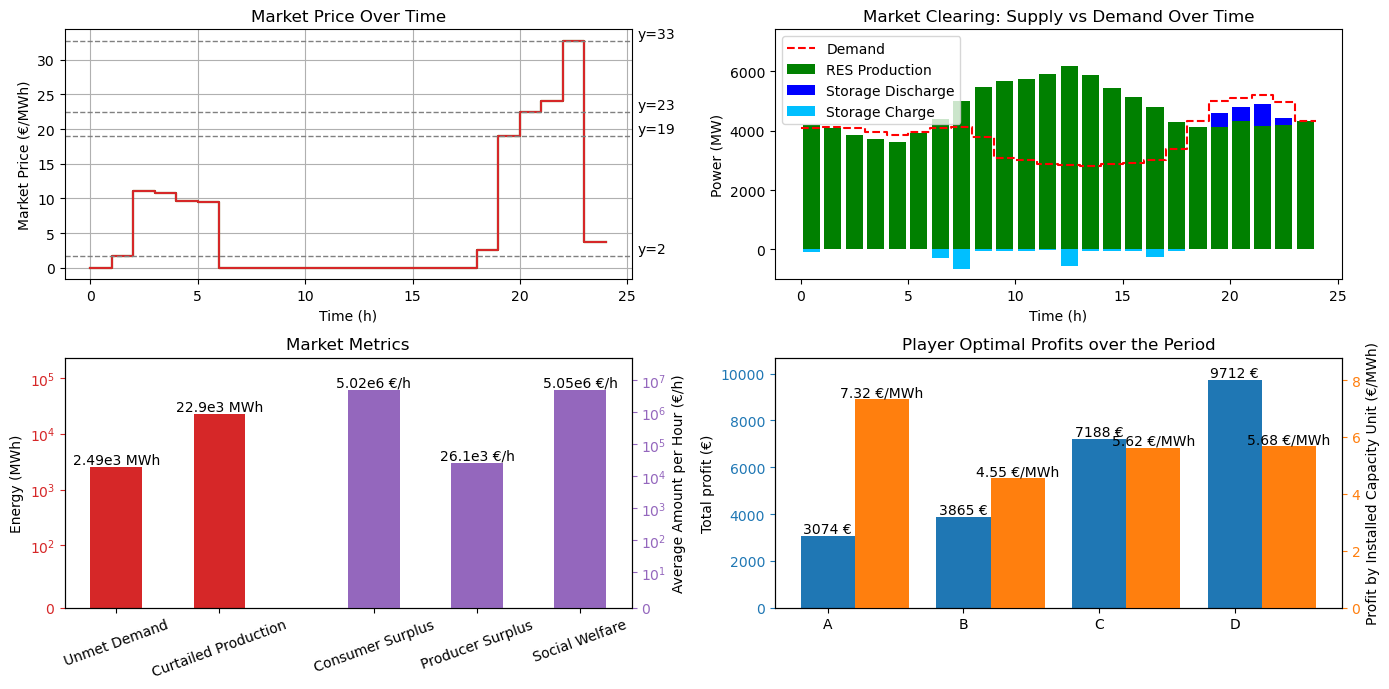

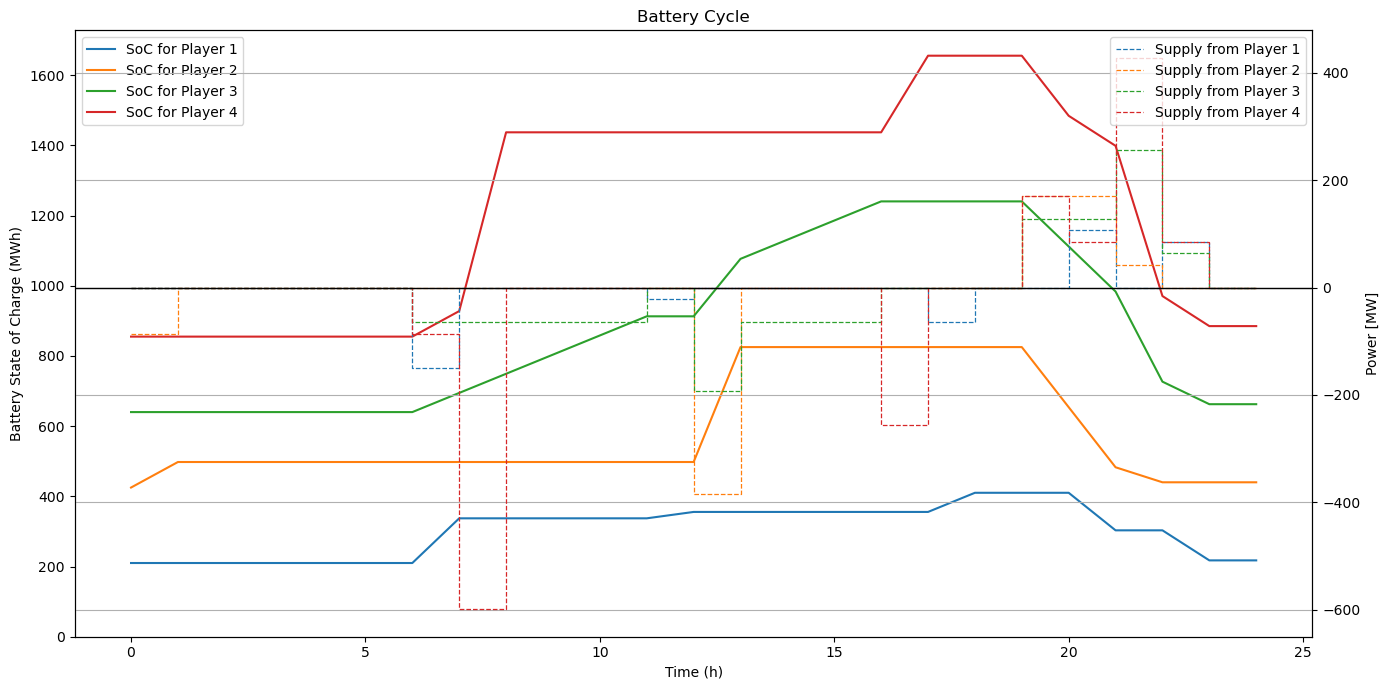

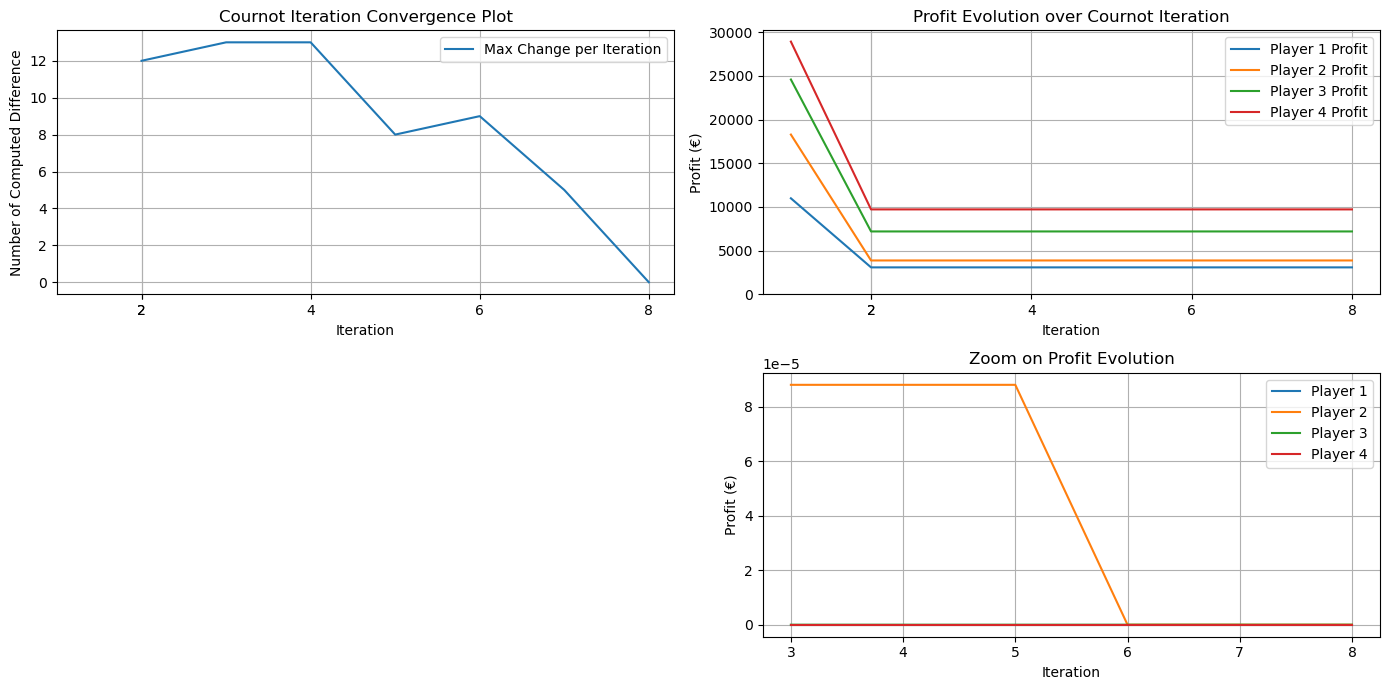

In [11]:
index += 1
sc = scenarios[index]
print("Optimization with modelling policy:", sc["name"])
outputs[sc["name"]] = main(season='LowLoad', n_players=4, policy_type=sc["policy_type"], policy_parameters={k: v for k, v in sc.items() if k != "name" and k != "policy_type"})
